# About Visualization Examples for NM Law Data Pipeline

This notebook provides example visualizations for key stages in the **NM Law Data Pipeline**, including:
- Case history over time,
- Legal concept subgraphs (e.g., estoppel),
- Benchmark performance on legal questions,
- Evaluation metrics across LLMs.

---

##   Purpose

Visualizations are essential for interpreting and validating large-scale legal datasets and model outputs. This notebook offers:
- Insightful overviews of case law trends,
- Network graphs of interrelated legal entities,
- Diagnostic views of LLM behavior on legal questions,
- Comparison plots for benchmarking AI systems in law.

These visual tools are used to:
- Guide exploratory legal analysis,
- Generate figures for publications,
- Debug and improve model performance.

---

##   Components

This notebook includes examples for:
1. **Court case plotting** – Temporal visualization of legal case distribution.
2. **Knowledge graph visualization** – Subgraphs of legal reasoning via Neo4j + NetworkX.
3. **Model behavior analysis** – Metrics on benchmark question sets.
4. **Evaluation plots** – FactCC, ROUGE, SummaC, and entailment scores across models.

Each block is modular, reusable, and customizable for different tasks, datasets, or visualization preferences.

---
---

# Plot Case History

This section demonstrates how to visualize the evolution of case volume and distribution over time, separated by court level (e.g., Supreme Court, Court of Appeals).

These plots allow researchers to:
- Track long-term trends in legal activity,
- Identify inflection points in jurisprudence,
- Align court decisions with external events (e.g., legislation, pandemics).

The plots are generated using a custom `CourtCasesPlotter` class built for flexible and reusable legal time series visualization.


### Load the data

Load structured CSVs representing court case metadata. The data should include at least:
- Decision year,
- Court level (Supreme or Appeals),
- Optional label metadata for visual annotations.

This data serves as the temporal foundation for the case history plot.



In [1]:
import json
import os
with open(os.path.join("..", "..","..","data", "NM_law_questions_and_dates","court_data.json"), "r") as f:
    loaded = json.load(f)

raw_sup    = loaded["supreme_court_events"]
raw_app = loaded["court_of_appeals_events"]
supreme_court_events = { int(y): lbl for y, lbl in raw_sup.items() }
court_of_appeals_events = { int(y): lbl for y, lbl in raw_app.items() }
supreme_court_data      = loaded["supreme_court_data"]
appellate_data          = loaded["appellate_data"]


### Define the class instance and then plot

Create an instance of the `CourtCasesPlotter` and call its `plot()` method with optional save paths or display toggles.

The class supports:
- Custom color schemes for each court,
- Event annotations (e.g., landmark rulings),
- PDF export for academic publishing or reports.


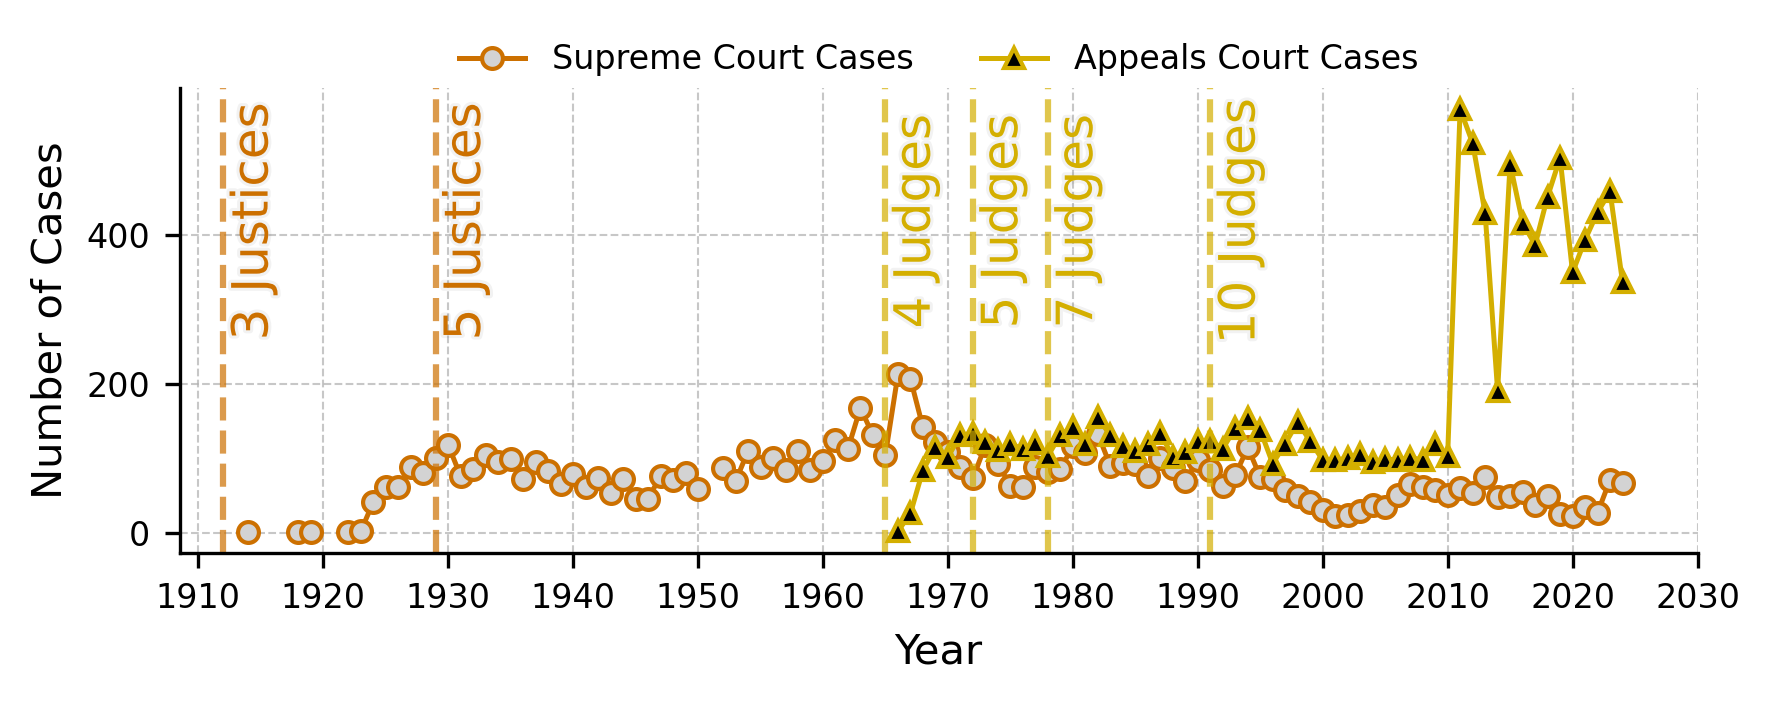

In [2]:
from case_history import CourtCasesPlotter
plotter = CourtCasesPlotter(
    supreme_court_data,
    appellate_data,
    sup_events=supreme_court_events,
    app_events=court_of_appeals_events
)
plotter.plot(save_path="court_cases_over_years.pdf")


# Plot Estoppel Comparison

This section constructs a visual subgraph from a Neo4j knowledge graph to explore the concept of estoppel across connected legal entities (e.g., cases, statutes, concepts).

This graph helps uncover:
- Related precedents or statutes,
- Interconnected legal doctrines,
- Legal interpretation patterns over time or by source.


### Define Neo4j credentials
Set up secure access to your Neo4j instance using environment variables or local configuration. This enables the notebook to send queries and retrieve subgraphs on-demand.

Neo4j can be installed locally from this [link](https://neo4j.com/product/neo4j-graph-database/)

In [ ]:
uri = "bolt://localhost:7687"
user = None         # these need to be set
password = None     # these need to be set

### Query neo4j, and build a subgraph in networkx for visual manipulation

Use Cypher to extract the relevant subset of the graph around the estoppel concept. Convert it into a NetworkX graph for Python-based manipulation and plotting.

This provides:
- Full control over layout, styling, and filtering,
- Easier integration with matplotlib, PyVis, or plotly,
- On-the-fly transformation before export.


In [ ]:
from estoppel_KG import run_query, build_full_graph 

data = run_query()
full_graph = build_full_graph(data)
print(f"Full graph: {full_graph.number_of_nodes()} nodes, {full_graph.number_of_edges()} edges.")

### Aggregate nodes for simplicity in visual

Group related nodes (e.g., all statutes, all Supreme Court cases) into higher-level aggregates to simplify the network layout.

This improves:
- Interpretability,
- Readability on dense graphs,
- Label clarity without reducing semantic integrity.


In [ ]:
from estoppel_KG import  build_custom_aggregated_graph

agg_graph = build_custom_aggregated_graph(full_graph)
print(f"Aggregated graph: {agg_graph.number_of_nodes()} nodes, {agg_graph.number_of_edges()} edges.")

### Plot the final graph

Render the final estoppel graph using `matplotlib` or `pyvis`, highlighting:
- Central cases or statutes,
- Link strength (e.g., citation frequency),
- Community clusters.

The result is a visual summary of the estoppel landscape, grounded in real legal citations.


In [ ]:
from estoppel_KG import  visualize_custom_aggregated_graph

visualize_custom_aggregated_graph(agg_graph, figsize=(12,6))

# Plot example image for the 25 questions for Attempt and Accuracy

This visualization compares model behavior on a benchmark set of 25 legal questions, plotting metrics like:
- Attempt rate (did the model answer?),
- Accuracy (was the answer correct or entailed?).

Useful for quickly comparing model coverage vs. precision across legal tasks.

### Define or load the data
Provide or load a CSV or DataFrame containing the benchmark questions, model outputs, and evaluation metrics (e.g., entailment, factuality, ROUGE).
The following code block contains mock data to show how to use the plot code.

In [ ]:
# Mock Data

data = {
    "model1": {"Q1": {"attempt": 1, "accuracy": 2},
               "Q2": {"attempt": 1, "accuracy": 3}},
    "model2": {"Q1": {"attempt": 1, "accuracy": 2},
               "Q2": {"attempt": 0, "accuracy": 0}},
    "model3": {"Q1": {"attempt": 1, "accuracy": 2},
               "Q2": {"attempt": 0, "accuracy": 0}},
    "model4": {"Q1": {"attempt": 1, "accuracy": 2},
               "Q2": {"attempt": 0, "accuracy": 0}},
    "model5": {"Q1": {"attempt": 1, "accuracy": 2},
               "Q2": {"attempt": 1, "accuracy": 3}},
}

### Import the class and then plot

Use a purpose-built plotting class to generate a clean, comparative scatter or bar plot of the attempt-accuracy relationship.

This aids in:
- Model selection and ablation analysis,
- Identifying which questions are universally hard,
- Evaluating robustness across domains (e.g., statutes vs. case law).



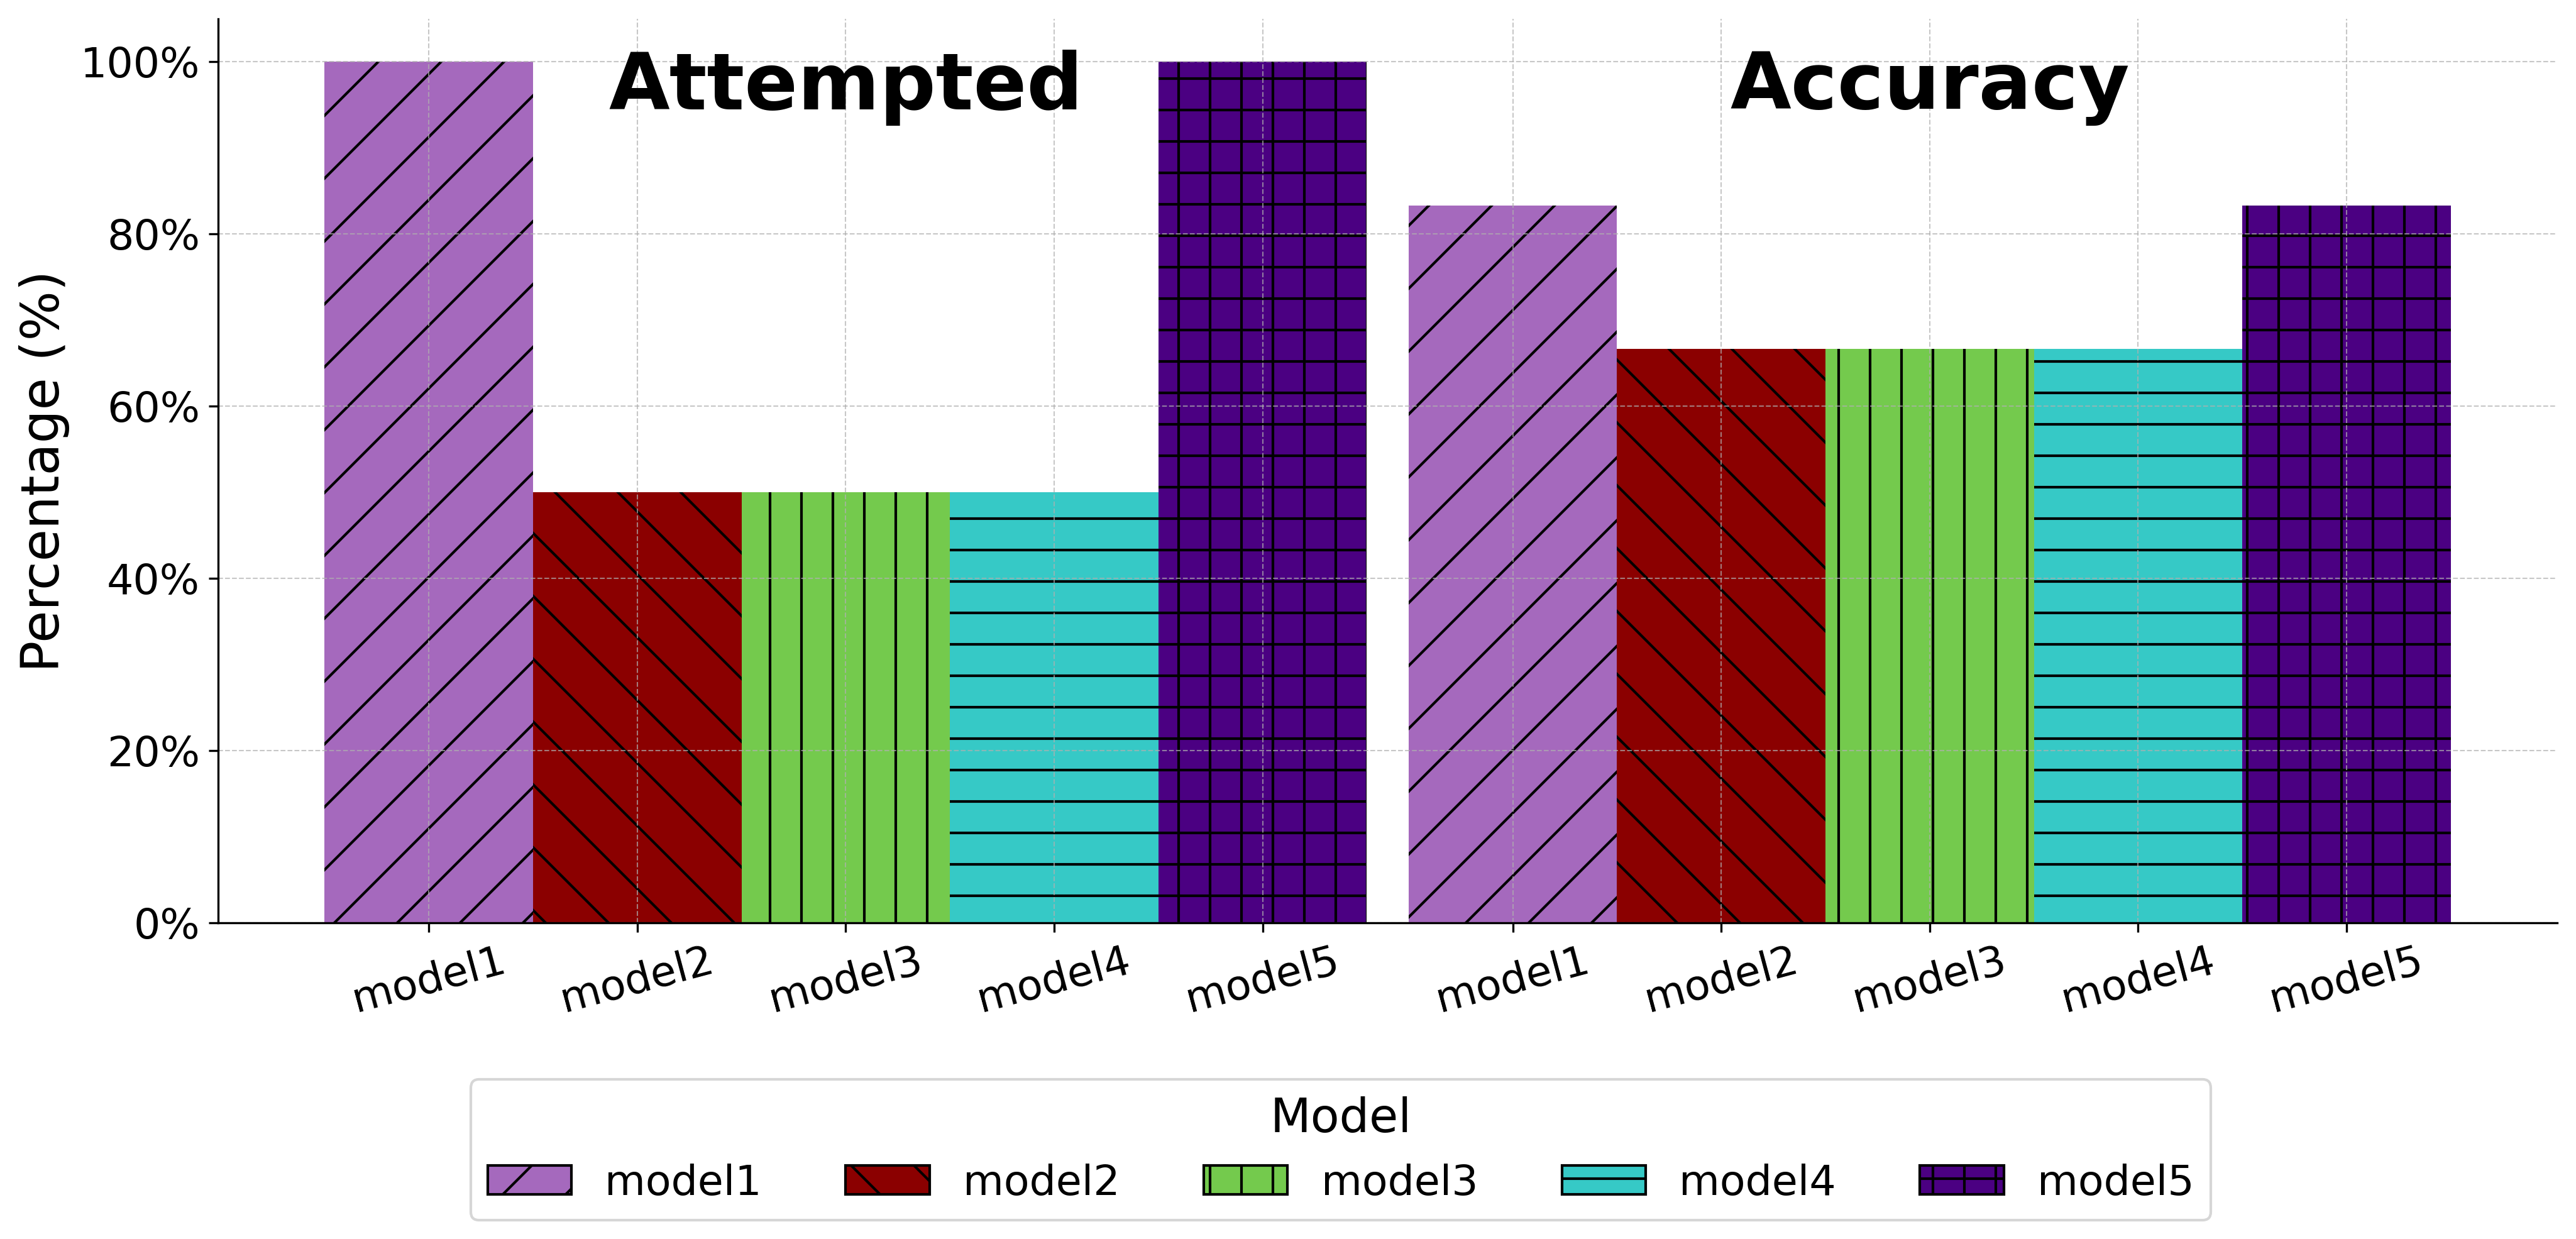

In [4]:
from analysis_25_question import AttemptAccuracyPlotter
plotter = AttemptAccuracyPlotter(data)

plotter.plot()

## Plot Model Evaluations 

Visualize aggregated evaluation scores (e.g., FactCC, ROUGE, SummaC) for multiple LLMs across one or more legal tasks.

These plots help:
- Benchmark performance of new models,
- Track improvements across versions or fine-tunes,
- Detect trade-offs (e.g., fluency vs. factuality).

### Define or load data
Load a CSV or DataFrame containing model names, scores per metric, and optionally metadata for coloring or faceting the plot (e.g., task type or prompt source).

The following code block contains mock data to show how to use the plot code.

In [ ]:
import pandas as pd
# Mock Data
short_data = pd.DataFrame([
    {"model": "SMART-SLIC", "factcc_score": 0.94, "nli_entailment": 0.91, "rougeL": 0.6, "summaC_score": 0.51},
    {"model": "google_bard", "factcc_score": 0.87, "nli_entailment": 0.84, "rougeL": 0.64, "summaC_score": 0.56},
    {"model": "openai", "factcc_score": 0.90, "nli_entailment": 0.86, "rougeL": 0.66, "summaC_score": 0.39},
])

### Define plotting metadata

Set up human-readable model labels, custom color maps, axis ranges, and any annotations to make the output clear and publication-ready.


In [6]:
metrics = ['factcc_score','nli_entailment','rougeL','summaC_score']
model_name_map = {
    'SMART-SLIC':     'Our System',
    'google_bard':    'Gemini Pro',
    'openai':         'GPT-4o',
}
color_map = {
    'Our System':    "#4B0082",
    'Gemini Pro':    "#8B0000",
    'GPT-4o':        "#A569BD",
}
hatch_map = {
    'Our System':    "+",
    'Gemini Pro':    "-",
    'GPT-4o':        "|",
}

### Instantiate and plot

Use a visualization class or reusable function to generate the comparison plot. Save or display it in high-resolution formats (e.g., for academic publication or blog posts).

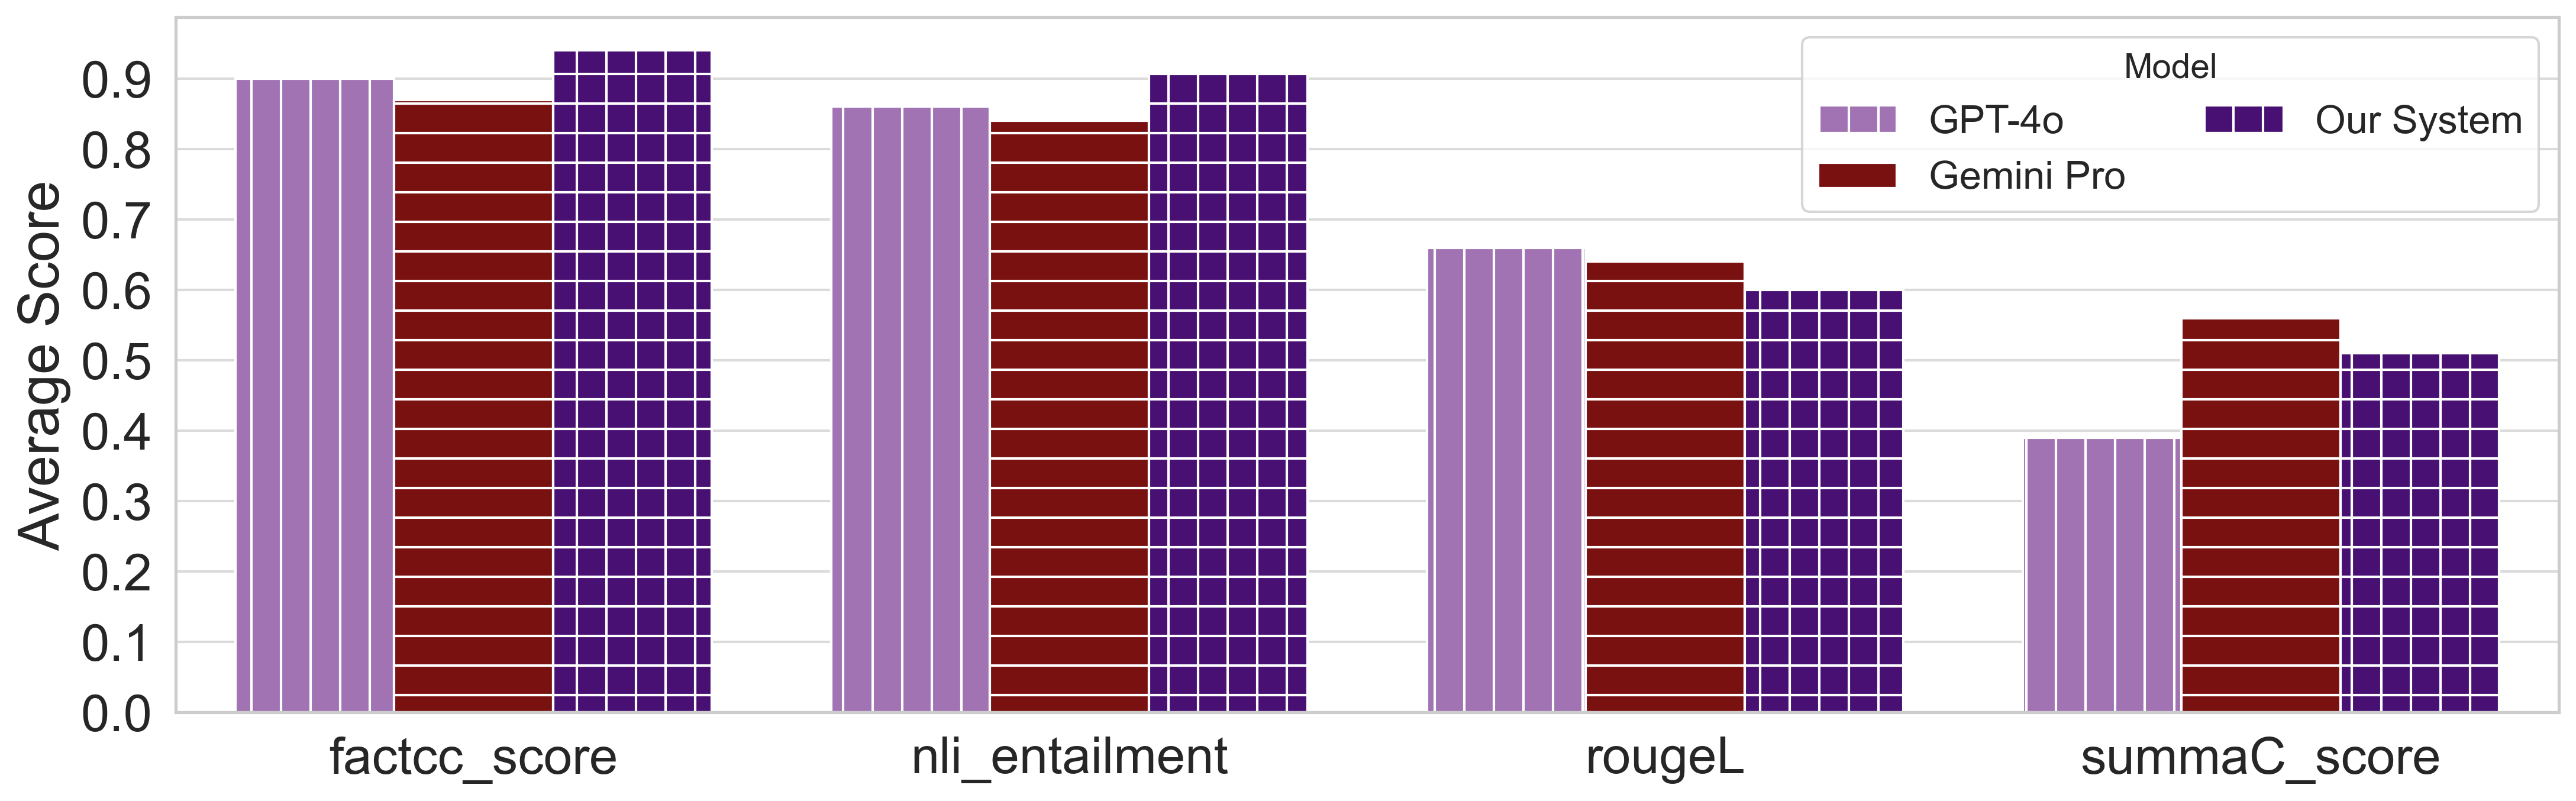

In [ ]:
from analysis_58_question import ModelPerformancePlotter

plotter = ModelPerformancePlotter(
    data=short_data,
    metrics=metrics,
    model_name_map=model_name_map,
    color_map=color_map,
    hatch_map=hatch_map
)
plotter.plot(save_path="model_evaluation_plot.pdf")